
# Nadaraya-Watson model

$$p(\mathbf{x},t) = \frac{1}{N}\sum_{n=1}^N f(\mathbf{x}-\mathbf{x}_n, t-t_n) \tag{6.42}$$

$$\begin{align*}
y(\mathbf{x}) = \mathbb{E}[t|\mathbf{x}] 
&= \int_{-\infty}^{\infty}tp(t|\mathbf{x})dt \\
&= \frac{\int tp(\mathbf{x}, t)dt}{\int p(\mathbf{x}, t)dt}\\
&= \frac{\sum_n \int tf(\mathbf{x}-\mathbf{x}, t-t_n)dt}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt} \tag{6.43}\\
\end{align*}$$

$$p(t|\mathbf{x}) = \frac{p(t,\mathbf{x})}{\int p(t, \mathbf{x})dt} = \frac{\sum_n f(\mathbf{x}-\mathbf{x}_n, t-t_n)}{\sum_m\int f(\mathbf{x}-\mathbf{x}_m,t-t_m)dt}\tag{6.48}$$

-------------------

# Example

When $p(t, \mathbf{x})$ is a isotropic Gaussian,
The kernel takes the form
$$k(\mathbf{x}, \mathbf{x}_n) = \frac{\int\mathcal{N}(x| x_n, \sigma^2)\mathcal{N}(t| t_n, \sigma^2) dt}{\sum_m \int\mathcal{N}(x| x_m,\sigma^2)\mathcal{N}(t| t_m,\sigma^2) dt} =  \frac{\mathcal{N}(x| x_n,\sigma^2)}{\sum_m \mathcal{N}(x| x_m,\sigma^2)}$$

The conditional expectation takes the form

$$y(x) = \sum_n \underbrace{\frac{\mathcal{N}(x| x_n,\sigma^2)}{\sum_m \mathcal{N}(x| x_m,\sigma^2)}}_{k(\mathbf{x},\mathbf{x}_n)} t_n$$

The conditional probability takes the form
$$p(t|\mathbf{x}) = \sum_n \underbrace{\frac{\mathcal{N}(x| x_n,\sigma^2)}{\sum_m\mathcal{N}(x| x_m,\sigma^2)}}_{k(\mathbf{x},\mathbf{x}_n)} \mathcal{N}(t| t_n,\sigma^2)$$

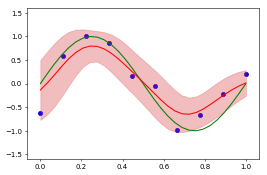

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.1
noise_sigma = 0.3
N = 10
Gaussian = lambda x, mu, sigma: 1/(np.sqrt(2*np.pi) * sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

def kernel(x, xn):
    # x is a value, xn is an array
    G = Gaussian(x, xn, sigma)
    return G/np.sum(G)

def main():
    fig = plt.figure(figsize=(6,4), dpi=50)
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-1.6, 1.6)
    
    #xn = np.random.uniform(0, 1, N)
    xn = np.linspace(0, 1, 10)
    noise = np.random.normal(0, noise_sigma, N)
    tn = np.sin(2*np.pi*xn)+noise
    lx = np.linspace(0, 1, 30)
    ly = np.sin(2*np.pi*lx)
    
    ax.plot(lx, ly, 'g')
    ax.scatter(xn, tn, color='b')
    
    y = np.zeros(ly.shape)
    std = np.zeros(ly.shape)
    for i in range(len(lx)):
        k = kernel(lx[i], xn)
        y[i] = np.sum(k*tn)
        
        # Mixture Gaussian standard derivation
        var = np.sum(k*sigma**2) + np.sum(k*tn**2) - np.sum(k*tn)**2
        std[i] = np.sqrt(var)
    #print(std)
    ax.plot(lx, y, 'r')
    ax.fill_between(lx, y-std, y+std, color='C3', alpha=0.3)
    plt.show()

if __name__=="__main__":
    main()

Reference: <a href='https://stats.stackexchange.com/questions/16608/what-is-the-variance-of-the-weighted-mixture-of-two-gaussians'>Mixture Gaussian standard derivation</a>
